# Objective

what to predict : predicting the max temperature for tomorrow (actual columns)<br>
how to predict : using random forest regressor <br>  
why to predict : estimate temperature for preparing tomorrow <br>

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import export_graphviz
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pydot

In [2]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams['figure.dpi'] = 100 

In [3]:
def overview_data(data, features, target):
    print(f"Dataset Shape: {data.shape}")
    
    df = data[features]
    df['target'] = data[target]
    overview = pd.DataFrame(df.dtypes,columns=['dtypes'])
    overview = overview.reset_index()
    overview['features'] = overview['index']
    overview = overview[['features','dtypes']]
    overview['Missing'] = df.isnull().sum().values   
    overview['%Missing'] = df.isnull().sum().values/df.shape[0]
    overview['%Missing'] = overview['%Missing'].apply(lambda x: format(x, '.2%'))
    overview['Uniqueness'] = df.nunique().values
    overview['%Unique'] = df.nunique().values/df.shape[0]
    overview['%Unique'] = overview['%Unique'].apply(lambda x: format(x, '.2%'))
    
    for var in overview['features']:
        overview.loc[overview['features'] == var, 'Minumum'] = df[var].min()
    for var in overview['features']:
        overview.loc[overview['features'] == var, 'Quantile 1'] = np.nanpercentile(df[var], 25)  
    for var in overview['features']:
        overview.loc[overview['features'] == var, 'Median'] = df[var].median()  
    for var in overview['features']:
        overview.loc[overview['features'] == var, 'Mean'] = df[var].mean()    
    for var in overview['features']:
        overview.loc[overview['features'] == var, 'Quartile 3'] = np.nanpercentile(df[var], 75)
    for var in overview['features']:
        overview.loc[overview['features'] == var, 'Maximum'] = df[var].max()
    for var in overview['features']:
        overview.loc[overview['features'] == var, 'Standar Deviation'] = df[var].std()    
    return overview

# Read Dataset

In [4]:
data = pd.read_csv('temps.csv')
data.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


# Check dataset

In [5]:
data.shape

(348, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [7]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [8]:
data.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

In [9]:
data.isnull().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [10]:
features = data.drop(['actual', 'week'], axis = 1).columns.values
target = 'actual'

In [11]:
overview_data(data, features, target)

Dataset Shape: (348, 12)


C:\Users\User\AppData\Local\Temp\ipykernel_13336\2234031733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = data[target]


,features,dtypes,Missing,%Missing,Uniqueness,%Unique,Minumum,Quantile 1,Median,Mean,Quartile 3,Maximum,Standar Deviation
0,year,int64,0,0.00%,1,0.29%,2016.0,2016.000,2016.0,2016.000000,2016.000,2016.0,0.000000
1,month,int64,0,0.00%,12,3.45%,1.0,3.000,6.0,6.477011,10.000,12.0,3.498380
2,day,int64,0,0.00%,31,8.91%,1.0,8.000,15.0,15.514368,23.000,31.0,8.772982
3,temp_2,int64,0,0.00%,56,16.09%,35.0,54.000,62.5,62.652299,71.000,117.0,12.165398
4,temp_1,int64,0,0.00%,56,16.09%,35.0,54.000,62.5,62.701149,71.000,117.0,12.120542
5,average,float64,0,0.00%,243,69.83%,45.1,49.975,58.2,59.760632,69.025,77.4,10.527306
6,forecast_noaa,int64,0,0.00%,37,10.63%,41.0,48.000,56.0,57.238506,66.000,77.0,10.605746
7,forecast_acc,int64,0,0.00%,37,10.63%,46.0,53.000,61.0,62.373563,72.000,82.0,10.549381
8,forecast_under,int64,0,0.00%,36,10.34%,44.0,50.000,58.0,59.772989,69.000,79.0,10.705256
9,friend,int64,0,0.00%,66,18.97%,28.0,47.750,60.0,60.034483,71.000,95.0,15.626179


In [12]:
data['year'].unique()

array([2016], dtype=int64)

<b> So, in this dataset we have 348 rows and 12 columns, without missing values in each columns, but we have object features (week column) that need to be converted to numerical type in order to be processed in ML model

In [13]:
data['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

# Data Preprocessing

In [14]:
# One-hot encode categorical features
data = pd.get_dummies(data)
data.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [15]:
print('Shape of features after one-hot encoding:', data.shape)

Shape of features after one-hot encoding: (348, 18)


In [16]:
data['actual']

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

# Divide features and labels

In [17]:
# Labels are the values we want to predict
y = data['actual']

# Remove the labels from the features
# axis 1 refers to the columns
X = data.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(X.columns)

In [18]:
feature_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

#### Using StandarScaler() to scale the value of each features (optional) 

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting data training and testing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:',  y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 17)
Training Labels Shape: (278,)
Testing Features Shape: (70, 17)
Testing Labels Shape: (70,)


# Training/Relationship

In [22]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

# Testing

In [23]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

## Model Evaluation 

In [24]:
# Calculate the absolute errors
errors = abs(y_test - predictions)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.sum(errors)/len(y_test), 8), 'degrees.')

Mean Absolute Error: 3.89618571 degrees.


In [25]:
# Calculate the absolute errors
errors_squared = abs(y_test - predictions)**2

# Print out the mean absolute error (mae)
print('Mean squared Error:', round(np.sum(errors_squared)/len(y_test), 8), 'degrees.')

Mean squared Error: 26.09318916 degrees.


In [26]:
# Calculate the absolute errors
errors_squared = abs(y_test - predictions)**2

# Print out the mean absolute error (mae)
print('Mean squared Error:', np.sqrt((round(np.sum(errors_squared)/len(y_test), 8))), 'degrees.')

Mean squared Error: 5.108149289126151 degrees.


In [27]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / len(y_test))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.43 %.


In [28]:
print('mean absoulte error (MAE): {:.8f}'.format(mean_absolute_error(y_test, predictions)))
print('mean squared error (MSE) : {:.8f}'.format(mean_squared_error(y_test, predictions)))
print('root mean squared error (RMSE) : {:.8f}'.format(mean_squared_error(y_test, predictions, squared = False)))
print('R squared : {:.8f}'.format(r2_score(y_test, predictions)))
print('median absoulte error (MedAE): {:.8f}'.format(median_absolute_error(y_test, predictions)))
print('median absoulte percentage error (MAPE): {:.8f}'.format(mean_absolute_percentage_error(y_test, predictions)))

mean absoulte error (MAE): 3.89618571
mean squared error (MSE) : 26.09318916
root mean squared error (RMSE) : 5.10814929
R squared : 0.81338722
median absoulte error (MedAE): 3.34000000
median absoulte percentage error (MAPE): 0.06166030


# Features importance

In [29]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.67
Variable: average              Importance: 0.15
Variable: forecast_acc         Importance: 0.05
Variable: forecast_noaa        Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


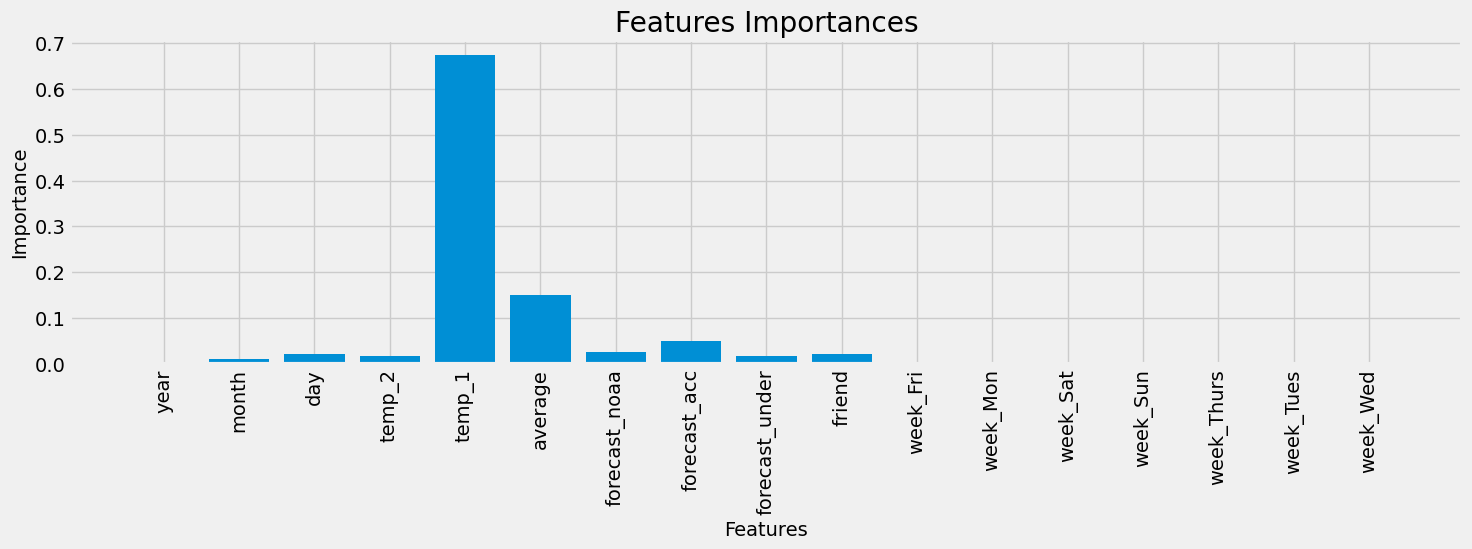

In [30]:
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Features Importances'); 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


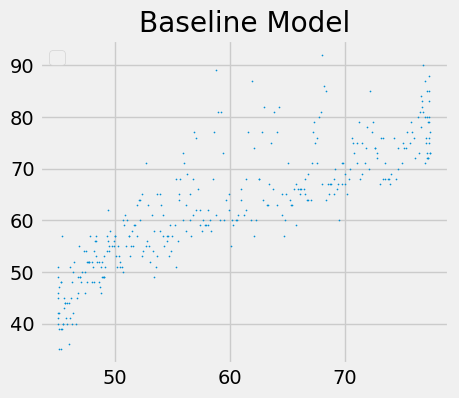

In [31]:
ax = plt.subplot(1, 3, 1)
plt.title("Baseline Model")
plt.scatter(data['average'],y,s=0.5)
# plt.plot(X,model.predict(X),'-r', label="Prediction")
# plt.legend(loc='upper left')

# plt.subplot(1, 3, 2, sharey=ax)
# plt.title("Positive outliers")
# plt.scatter(X,y_plus,s=0.5)
# plt.plot(X,model_plus.predict(X),'-r', label="Prediction")
# plt.legend(loc='upper left')

# plt.subplot(1, 3, 3, sharey=ax)
# plt.title("Negative outliers")
# plt.scatter(X,y_minus,s=0.5)
# plt.plot(X,model_minus.predict(X),'-r', label="Prediction")
plt.legend(loc='upper left')
plt.show()